# Real Time Detection

In [49]:
# haarcascade

import numpy as np
import cv2
import tensorflow as tf

model = tf.keras.models.load_model("face_mask.h5")
label = {0:"With Mask",1:"Without Mask"}
color_label = {0: (0,255,0),1 : (0,0,255)}
cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

frame = cv2.VideoCapture(0)

while(True):
    k = cv2.waitKey(1)
    ret,img=frame.read()
    if k%256 == 32:
        cv2.imwrite("image0.jpg", img) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = cascade.detectMultiScale(gray, 1.1,4)
    if len(faces)>0:
        for x,y,w,h in faces:            
            face_image = img[y:y+h,x:x+w]
            resize_img  = cv2.resize(face_image,(150,150))
            normalized = resize_img/255.0
            reshape = np.reshape(normalized,(1,150,150,3))
            reshape = np.vstack([reshape])
            result = model.predict(reshape)
            r = np.argmax(result[0])
            cv2.rectangle(img,(x,y),(x+w,y+h),color_label[r],3)
            cv2.rectangle(img,(x,y-50),(x+w,y),color_label[r],-1)
            cv2.putText(img,label[r]+' '+str(round(result[0][r]*100,2))+'%',(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
    if k%256 == 27:
        break
    cv2.imshow('img',img)
frame.release()
cv2.destroyAllWindows()

In [ ]:
# MTCNN

import numpy as np
import cv2
import tensorflow as tf
from mtcnn.mtcnn import MTCNN

model_mtcnn = MTCNN()

model = tf.keras.models.load_model("face_mask.h5")
label = {0:"With Mask",1:"Without Mask"}
color_label = {0: (0,255,0),1 : (0,0,255)}

frame = cv2.VideoCapture(0)

while(True):
    k = cv2.waitKey(1)
    ret,img=frame.read()
    if k%256 == 32:
        cv2.imwrite("image0.jpg", img) 
    faces = model_mtcnn.detect_faces(img)
    if len(faces)>0:
        for face in faces:
            x,y,w,h = face['box']
            face_image = img[y:y+h,x:x+w]
            resize_img  = cv2.resize(face_image,(150,150))
            normalized = resize_img/255.0
            reshape = np.reshape(normalized,(1,150,150,3))
            reshape = np.vstack([reshape])
            result = model.predict(reshape)
            r = np.argmax(result[0])
            cv2.rectangle(img,(x,y),(x+w,y+h),color_label[r],3)
            cv2.rectangle(img,(x,y-50),(x+w,y),color_label[r],-1)
            cv2.putText(img,label[r]+' '+str(round(result[0][r]*100,2))+'%',(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
    if k%256 == 27:
        break
    cv2.imshow('img',img)
frame.release()
cv2.destroyAllWindows()

# Detection From Image

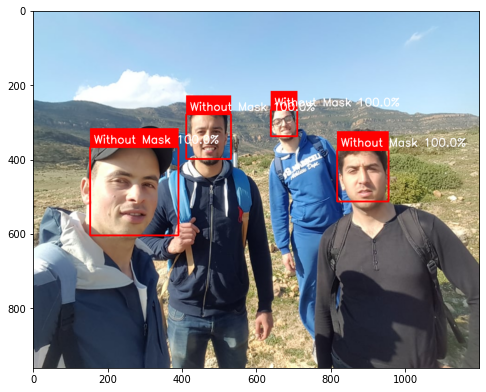

In [8]:
import cv2
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
label = {0:"With Mask",1:"Without Mask"}
color_label = {0: (0,255,0),1 : (255,0,0)}
cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
i = "image.jpg"

frame = cv2.imread(i)
if frame.shape[1]<1200:
    u = 1200/frame.shape[1]
    a = int(frame.shape[1] * u)
    b = int(frame.shape[0] + a-frame.shape[1])
else:
    a = frame.shape[1]
    b = frame.shape[0]
frame = cv2.resize(frame,(a,b))
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
faces = cascade.detectMultiScale(gray,1.1,18)
for x,y,w,h in faces:
    face_image = frame[y:y+h,x:x+w]
    resize_img  = cv2.resize(face_image,(150,150))
    normalized = resize_img/255.0
    reshape = np.reshape(normalized,(1,150,150,3))
    reshape = np.vstack([reshape])
    result = model.predict(reshape)
    r = np.argmax(result)
    cv2.rectangle(frame,(x,y),(x+w,y+h),color_label[r],3)
    cv2.rectangle(frame,(x,y-50),(x+w,y),color_label[r],-1)
    cv2.putText(frame,label[r]+' '+str(round(result[0][r]*100,2))+'%',(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
    plt.imshow(frame)